# Question A

## Regression Model 1: From Scratch Implementation

In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('Student_Performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [38]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [39]:
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
categorical_features = ['Extracurricular Activities']
target = 'Performance Index'

In [41]:
df_num = df[numerical_features]
df_num_z = (df_num - df_num.mean()) / df_num.std()

In [42]:
df_cat = pd.get_dummies(df[categorical_features], drop_first=True)

In [43]:
X = pd.concat([df_num_z, df_cat], axis=1)
y = df[target].values.reshape(-1, 1)

In [44]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split = int(0.8 * X.shape[0])
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
y_train, y_test = y[train_idx], y[test_idx]


In [45]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test].astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [46]:
theta = np.linalg.pinv(X_train_bias) @ y_train
y_pred = X_test_bias @ theta

In [47]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

In [48]:
mse_scratch = mean_squared_error(y_test, y_pred)
r2_scratch = r2_score(y_test, y_pred)

print("From Scratch Linear Regression:")
print("MSE:", mse_scratch)
print("R² Score:", r2_scratch)

From Scratch Linear Regression:
MSE: 4.215207202729273
R² Score: 0.9881563657419437


## Regression Model 2: Scikit-learn Implementation

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
df = pd.read_csv('Student_Performance.csv')

In [51]:
X = df[numerical_features + categorical_features]
y = df[target]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [54]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [55]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [56]:
y_pred_sklearn = model.predict(X_test_processed)

In [57]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Scikit-learn Linear Regression:")
print("MSE:", mse_sklearn)
print("R² Score:", r2_sklearn)

Scikit-learn Linear Regression:
MSE: 4.163724682082589
R² Score: 0.988332960681654


## Evaluation and Visualization

In [58]:
import matplotlib.pyplot as plt

In [ ]:
y_test_flat = y_test.flatten() if hasattr(y_test, "flatten") else y_test

In [59]:
print("----- Model Comparison -----")
print(f"Numpy Model     - MSE: {mse_scratch:.4f}, R² Score: {r2_scratch:.4f}")
print(f"Scikit-learn Model - MSE: {mse_sklearn:.4f}, R² Score: {r2_sklearn:.4f}")

----- Model Comparison -----
Numpy Model     - MSE: 4.2152, R² Score: 0.9882
Scikit-learn Model - MSE: 4.1637, R² Score: 0.9883


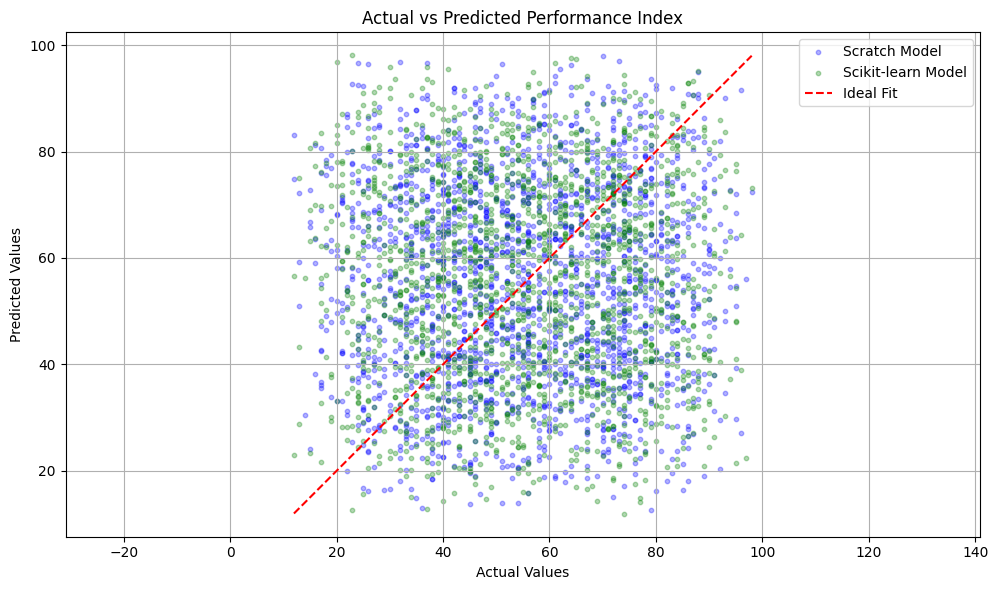

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, y_pred, color='blue', label='Scratch Model', alpha=0.3, s=10)
plt.scatter(y_test_flat, y_pred_sklearn, color='green', label='Scikit-learn Model', alpha=0.3, s=10)
plt.plot([min(y_test_flat), max(y_test_flat)],
         [min(y_test_flat), max(y_test_flat)],
         'r--', label='Ideal Fit')

plt.title("Actual vs Predicted Performance Index")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()



# Question B

### What is the difference between ACF and PACF?

- ACF (Autocorrelation Function) shows the correlation between a time series and its past values (lags). It tells us how strongly the current value is related to values at previous time steps, but it includes both direct and indirect effects.

- PACF (Partial Autocorrelation Function) shows only the direct relationship between the time series and its lagged values, removing the effect of any lags in between.

### Describe how you would identify the optimal order of an AR model using ACF and PACF plots.

- The PACF plot shows how much the current value is directly related to its previous values, without the influence of other lags in between. We look for the point where the PACF suddenly drops (or "cuts off") — this helps us decide how many lag terms we should include.

- If the ACF decreases gradually (like a slope or wave), that supports the idea that an AR model is a good fit.

## B.3


In [64]:
df = pd.read_csv('AirPassengers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [65]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


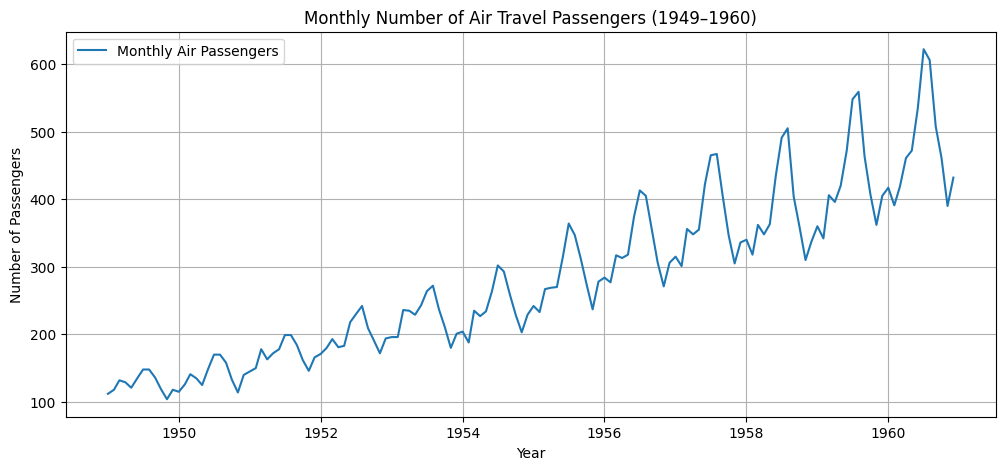

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df, label='Monthly Air Passengers')
plt.title("Monthly Number of Air Travel Passengers (1949–1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.legend()
plt.show()


<Figure size 1200x500 with 0 Axes>

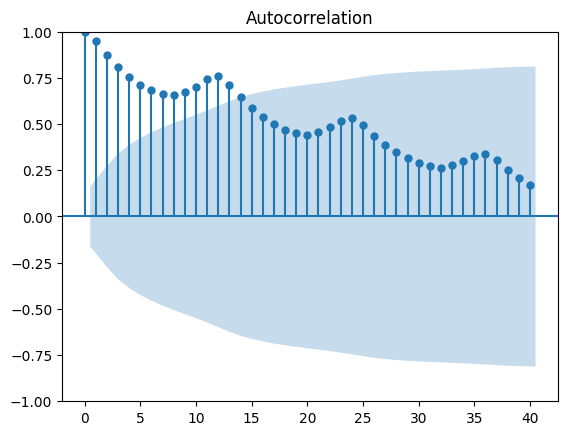

<Figure size 1200x500 with 0 Axes>

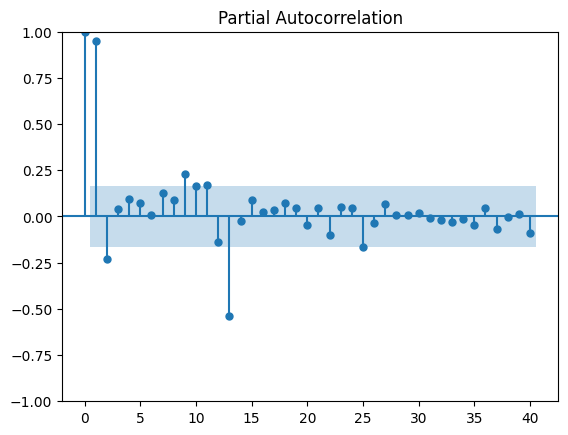

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df['Passengers'], lags=40)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Passengers'], lags=40, method='ywm') 
plt.show()


In [70]:
train = df[:'1959']
test = df['1960':]


In [71]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train['Passengers'], lags=12)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Mean Squared Error: 305.81362264269245


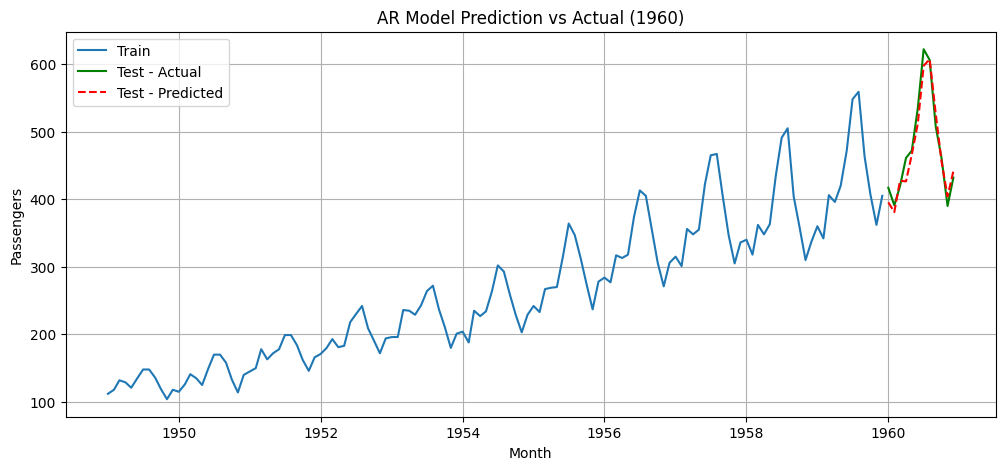

In [72]:
from sklearn.metrics import mean_squared_error

# Evaluation
mse = mean_squared_error(test['Passengers'], predictions)
print("Mean Squared Error:", mse)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test - Actual', color='green')
plt.plot(test.index, predictions, label='Test - Predicted', color='red', linestyle='--')
plt.title("AR Model Prediction vs Actual (1960)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()
